# 機械学習入門授業前課題2 住宅価格の予測

### テキストの目的

- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする

### どのように学ぶか

- 定番のデータセットを通じて、回帰問題を解く流れやライブラリの使い方を学びます。

### 住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。


[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

**今回使う手法の一覧**

scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

### データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。


[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### 回帰問題の流れ

回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

**練習のための準備**

このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [1]:
#ライブラリのインポート

# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  #データ分割

# visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# machine learning
import sklearn
from sklearn.linear_model import LinearRegression # 線形回帰
from sklearn.svm import SVR # SVM 
from sklearn.tree import DecisionTreeRegressor # 決定木
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト 

#model_evaluation & tuning
from sklearn.metrics import mean_squared_error # 平均二乗誤差
from sklearn.metrics import mean_absolute_error # 平均絶対誤差
from sklearn.metrics import r2_score #R^2値

In [2]:
df = pd.read_csv("train.csv")
df = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [4]:
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


<Figure size 864x576 with 0 Axes>

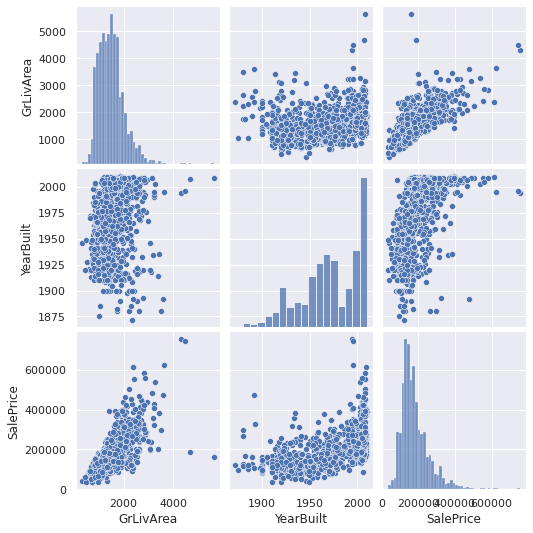

In [5]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, palette='Reds')
sns.set()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

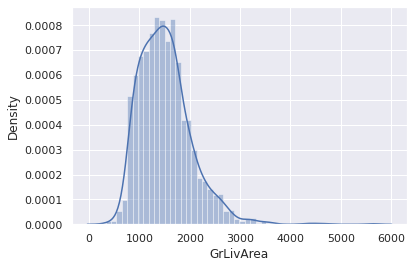

In [6]:
sns.distplot(df["GrLivArea"], bins=50)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

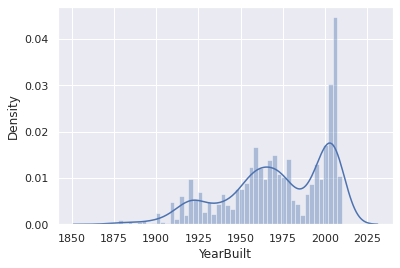

In [7]:
sns.distplot(df["YearBuilt"], bins=50)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

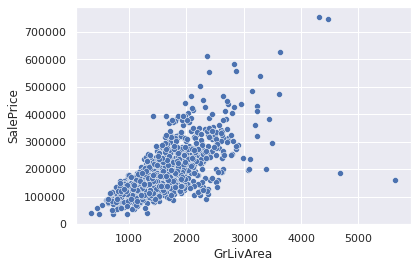

In [8]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

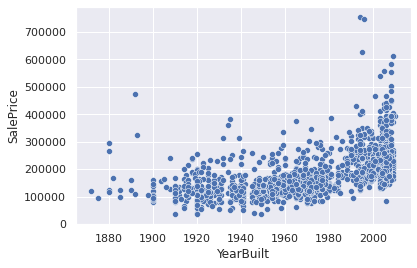

In [9]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)

対数変換処理を行う理由に関する参考サイト：https://pisara.hiheki.com/data-analysis/411/data-conversion-normalization/

In [10]:
# scikit-learnでの処理のため、ndarrayへ変換

X = df.drop('SalePrice', axis=1).values
y = df.loc[:, 'SalePrice'].values
print(X.shape)
print(y.shape)

(1460, 2)
(1460,)


In [11]:
# 訓練データ75%、検証データ25%用に分割

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 2)
(365, 2)
(1095,)
(365,)


In [12]:
# 線形回帰

lin = LinearRegression()# インスタンス作成
lin.fit(X_train, y_train) # 学習
lin_pred = lin.predict(X_test) # 予測
lin_pred

array([264130.40861155, 155093.63716252, 127493.47870881, 236349.8094044 ,
       138415.02247492,  68001.4401539 , 212572.79449248, 130915.3471754 ,
       498069.48870688, 173760.0569042 , 200489.65236043, 201591.22211132,
       255410.93962238, 115321.21029985, 113481.85032117, 145725.14931418,
       242207.30250925, 152306.23872418, 146617.18064977, 152472.84046326,
       147519.02950873, 148718.47833507, 102874.99846127, 200713.38469837,
       218832.27248909, 109832.22802565, 216030.6801281 ,  91825.7681413 ,
       235642.59522153, 125651.57562222, 192314.4036478 , 228657.33272014,
       127957.32550699, 277648.7376309 , 270992.71586664, 199345.14593332,
       220053.54456181, 118752.54138154, 270519.05154509, 313203.31047548,
       221645.87057309, 148177.86589128, 195307.73266869, 246124.30363549,
       331201.7861278 , 193829.2541969 ,  95432.80866889, 124100.3529958 ,
       203969.36124244,  96413.96628138, 327109.07555566, 130294.71616152,
       168520.65170532,  

In [13]:
# 平均二乗誤差（Mean Squared Error, MSE）を用いて評価

lin_mse = mean_squared_error(y_test, lin_pred)
lin_mse

2725908099.063638

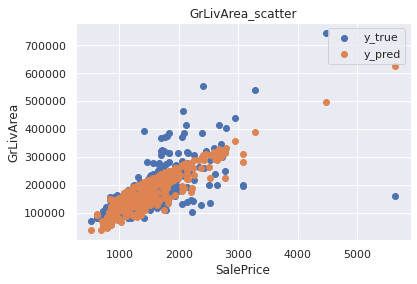

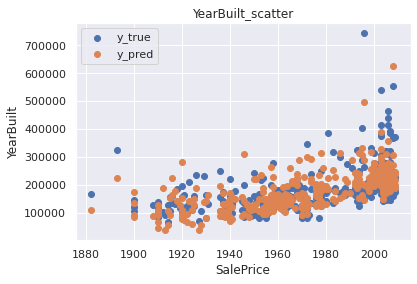

In [14]:
# 可視化:scatterを用いて、実際のデータと予測結果を比較

plt.title('GrLivArea_scatter')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.scatter(X_test[:, 0], y_test, label='y_true')
plt.scatter(X_test[:, 0], lin_pred, label='y_pred')
plt.legend()
plt.show()

plt.title('YearBuilt_scatter')
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.scatter(X_test[:, 1], y_test, label='y_true')
plt.scatter(X_test[:, 1], lin_pred, label='y_pred')
plt.legend()
plt.show()

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


- [sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

In [15]:
mse_list = [lin_mse]

SVM
平均二乗誤差（MSE）: 6941911042.0202465


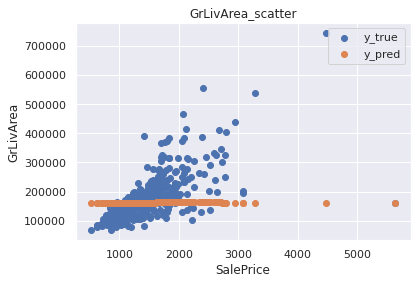

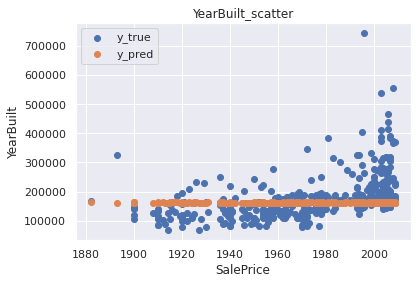

In [16]:
# SVM

svm = SVR() # インスタンス作成
svm.fit(X_train, y_train) # 学習
svm_pred = svm.predict(X_test) # 予測

# 平均二乗誤差（Mean Squared Error, MSE）を用いて評価
svm_mse = mean_squared_error(y_test, svm_pred)
mse_list.append(svm_mse)

print('SVM')
print('平均二乗誤差（MSE）: {}'.format(svm_mse))

# 可視化:scatterを用いて、実際のデータと予測結果を比較
plt.title('GrLivArea_scatter')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.scatter(X_test[:, 0], y_test, label='y_true')
plt.scatter(X_test[:, 0], svm_pred, label='y_pred')
plt.legend()
plt.show()

plt.title('YearBuilt_scatter')
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.scatter(X_test[:, 1], y_test, label='y_true')
plt.scatter(X_test[:, 1], svm_pred, label='y_pred')
plt.legend()
plt.show()

決定木
平均二乗誤差（MSE）: 2995657880.451446


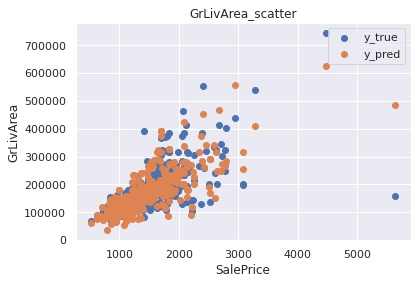

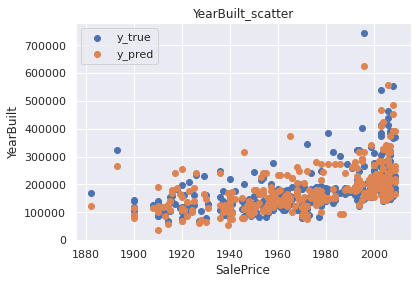

In [17]:
# 決定木

dtr = DecisionTreeRegressor() # インスタンス作成
dtr.fit(X_train, y_train) # 学習
dtr_pred = dtr.predict(X_test) # 予測

# 平均二乗誤差（Mean Squared Error, MSE）を用いて評価
dtr_mse = mean_squared_error(y_test, dtr_pred)
mse_list.append(dtr_mse)

print('決定木')
print('平均二乗誤差（MSE）: {}'.format(dtr_mse))

# 可視化:scatterを用いて、実際のデータと予測結果を比較
plt.title('GrLivArea_scatter')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.scatter(X_test[:, 0], y_test, label='y_true')
plt.scatter(X_test[:, 0], dtr_pred, label='y_pred')
plt.legend()
plt.show()

plt.title('YearBuilt_scatter')
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.scatter(X_test[:, 1], y_test, label='y_true')
plt.scatter(X_test[:, 1], dtr_pred, label='y_pred')
plt.legend()
plt.show()

ランダムフォレスト
平均二乗誤差（MSE）: 1860615083.9592037


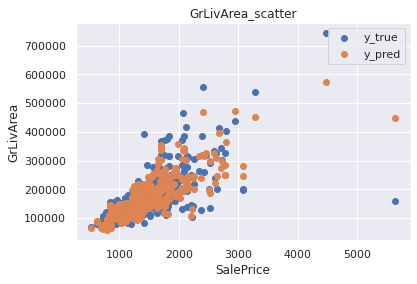

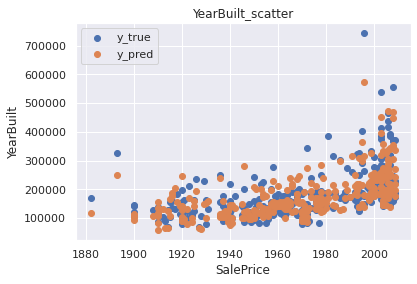

In [18]:
# ランダムフォレスト

rf = RandomForestRegressor() # インスタンス作成
rf.fit(X_train, y_train) # 学習
rf_pred = rf.predict(X_test) # 予測

# 平均二乗誤差（Mean Squared Error, MSE）を用いて評価
rf_mse = mean_squared_error(y_test, rf_pred)
mse_list.append(rf_mse)

print('ランダムフォレスト')
print('平均二乗誤差（MSE）: {}'.format(rf_mse))

# 可視化:scatterを用いて、実際のデータと予測結果を比較
plt.title('GrLivArea_scatter')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.scatter(X_test[:, 0], y_test, label='y_true')
plt.scatter(X_test[:, 0], rf_pred, label='y_pred')
plt.legend()
plt.show()

plt.title('YearBuilt_scatter')
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.scatter(X_test[:, 1], y_test, label='y_true')
plt.scatter(X_test[:, 1], rf_pred, label='y_pred')
plt.legend()
plt.show()

In [19]:
# 指標値を１つの表にまとめる

compare_df = pd.DataFrame([])
compare_df['MSE'] = mse_list
compare_df.rename(index={0:'線形回帰', 1:'SVM', 2:'決定木', 3:'ランダムフォレスト'}, inplace=True)
compare_df

,MSE
線形回帰,2.725908e+09
SVM,6.941911e+09
決定木,2.995658e+09
ランダムフォレスト,1.860615e+09


**考察：**

- MSEの値はランダムフォレストが一番低く、精度が最も高いのに対し、SVMの精度が一番低かった。散布図からも同じ傾向が見られた。